In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [0]:

%matplotlib inline

In [0]:
data = pd.read_csv("train.csv")

In [42]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
data.pop("Name")
data.pop("PassengerId")
data.pop("Ticket")

data.pop("Cabin")
data.Embarked=data.Embarked.fillna("S")

In [0]:
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])


In [49]:
data["Age"]=data["Age"].fillna(data["Age"].median())
data.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,28.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


In [50]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

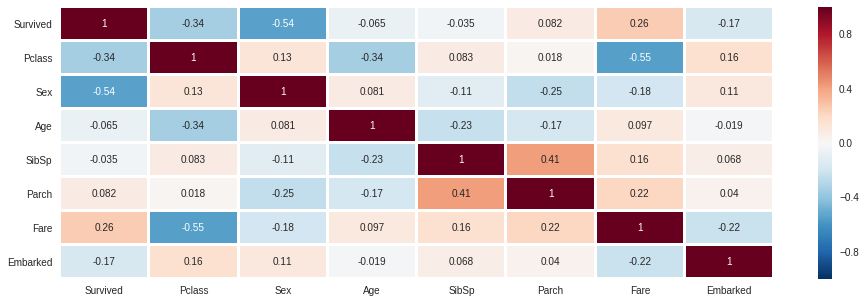

In [51]:
plt.figure(figsize = (16,5))
sns.heatmap(data.corr(),annot = True,linewidths=2)

In [0]:
#sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


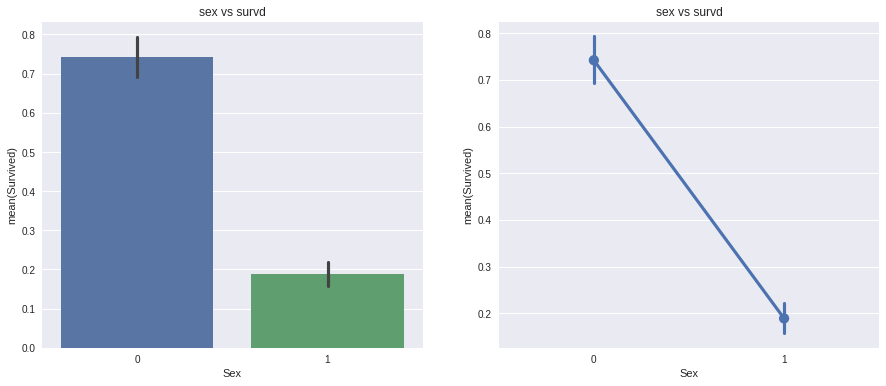

In [55]:
f,ax=plt.subplots(1,2,figsize=(15,6))
sns.barplot('Sex','Survived',data=data,ax=ax[0])
ax[0].set_title('sex vs survd')
sns.factorplot('Sex','Survived',data=data,ax=ax[1])
ax[1].set_title('sex vs survd')
plt.close(2)
plt.show()

In [56]:
""""labels = 'male','female'
sizes = [40, 20, 20, 20]
colors = ['yellowgreen', 'gold',]
explode = (0, 0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Year 2013')
plt.show()""""


SyntaxError: ignored

In [0]:
x=data.drop(labels='Survived',axis=1)
y=data['Survived']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=11)

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight='balanced')
knn= KNeighborsClassifier()
lr.fit(x_train,y_train)
knn.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
clf=GaussianNB()

In [0]:
from sklearn.metrics import roc_auc_score

In [91]:
roc_auc_score(lr.predict(x_test),y_test)

0.7964556810710657

In [92]:
roc_auc_score(knn.predict(x_test),y_test)

0.6496294403271148

In [93]:
clf.fit(x_train,y_train)
roc_auc_score(clf.predict(x_test),y_test,average='macro', sample_weight=None)

0.8141491277084497

In [98]:
d_test=pd.read_csv('test.csv')
d_test.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [99]:
d_test.pop("Name")
d_test.pop("PassengerId")
d_test.pop("Ticket")

d_test.pop("Cabin")
d_test.Embarked=d_test.Embarked.fillna("S")
le=LabelEncoder()
d_test['Sex']=le.fit_transform(d_test['Sex'])
d_test['Embarked']=le.fit_transform(d_test['Embarked'])
d_test["Age"]=data["Age"].fillna(d_test["Age"].median())
d_test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,0,0,7.8292,1
1,3,0,38.0,1,0,7.0000,2
2,2,1,26.0,0,0,9.6875,1
3,3,1,35.0,0,0,8.6625,2
4,3,0,35.0,1,1,12.2875,2
5,3,1,28.0,0,0,9.2250,2
6,3,0,54.0,0,0,7.6292,1
7,2,1,2.0,1,1,29.0000,2
8,3,0,27.0,0,0,7.2292,0
9,3,1,14.0,2,0,24.1500,2


In [101]:
d_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [105]:
null_columns=d_test.columns[d_test.isnull().any()]
print(d_test[d_test["Fare"].isnull()][null_columns])

     Fare
152   NaN


In [106]:
d_test.head(153)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,0,0,7.8292,1
1,3,0,38.0,1,0,7.0000,2
2,2,1,26.0,0,0,9.6875,1
3,3,1,35.0,0,0,8.6625,2
4,3,0,35.0,1,1,12.2875,2
5,3,1,28.0,0,0,9.2250,2
6,3,0,54.0,0,0,7.6292,1
7,2,1,2.0,1,1,29.0000,2
8,3,0,27.0,0,0,7.2292,0
9,3,1,14.0,2,0,24.1500,2


In [0]:
d_test["Fare"]=d_test["Fare"].fillna(7.8958)

In [108]:
d_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
d_pre=clf.predict(d_test)

In [0]:
sub=pd.read_csv('gender_submission.csv')

In [117]:
sub.head

<bound method NDFrame.head of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         

In [112]:
sub.shape

(418, 2)

In [0]:
sub['Survived']=d_pre

In [120]:
sub.head

<bound method NDFrame.head of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         1
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         1
391         1283         

In [121]:
d_pre

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,